In [78]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [79]:
#Importar Dados
dataset = pd.read_csv("tempo.csv", sep=";")
#Visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [80]:
#Tamanho do Arquivo
dataset.shape
#(linhas,colunas)

(14, 5)

In [81]:
#Analisando dados da coluna Aparencia
#Na coluna só pode haver os atributos sol, chuva e nublado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

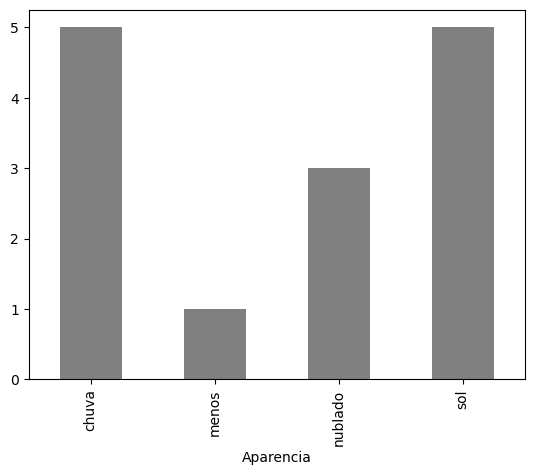

In [82]:
#Gráfico em barras
agrupado.plot.bar(color = "gray")

In [84]:
#Substituindo a linha "menos" por chuva no coluna Aparencia
dataset.loc[dataset["Aparencia"] == "menos", "Aparencia"] = "chuva"

In [85]:
#Atualizando a lista de "Aparencia" com o resultado da substituição da linha "menos"
agrupado = dataset.groupby("Aparencia").size()
agrupado

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [86]:
#Analisando dados de Temperatura
#Tem que estar entre -135°F a 130°F
agrupado = dataset.groupby("Temperatura").size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [87]:
#Panorama geral dos valores da coluna Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [88]:
#Calculando a mediana
mediana = sts.median(dataset["Temperatura"])
mediana

73.5

In [89]:
#Inserindo a mediana nos valores que não correspondem ao esperado (-135 a 130)
dataset.loc[(dataset["Temperatura"] < -135) | (dataset["Temperatura"] > 130), "Temperatura"] = int(mediana)

In [90]:
#Analisando lista de Temperatura para verificar as mudanças realizadas
agrupado = dataset.groupby("Temperatura").size()
agrupado

Temperatura
64    1
65    1
68    1
69    1
70    1
71    1
72    1
73    1
75    2
80    1
81    1
83    1
85    1
dtype: int64

In [91]:
#Analisando a coluna Umidade
#Umidade precisa estar entre 0 e 100
agrupado = dataset.groupby("Umidade").size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [92]:
#Panorama geral da coluna Umidade
dataset["Umidade"].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [93]:
#Inserindo a mediana da coluna Umidade em uma variável
mediana = sts.median(dataset["Umidade"])
mediana

85.5

In [95]:
#Inserindo o valor da mediana nas linhas da coluna Umidade fora dos parametros (Entre 0 e 100)
dataset.loc[(dataset["Umidade"] < 0) | (dataset["Umidade"] > 100)] = int(mediana) 

In [96]:
#Analisando novamente a coluna Umidade, após o tratamento
dataset.groupby("Umidade").size()

Umidade
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
85.5    1
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

In [97]:
#Analisando a coluna Jogar
#Devem conter apenas os valores Sim e Não
dataset.groupby("Jogar").size()

Jogar
85.5    1
nao     5
sim     8
dtype: int64

In [98]:
#Identificando qual linha da coluna está fora dos parametros
dataset.loc[dataset["Jogar"] == 85.5]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,85.5,85.5,85.5,85.5,85.5


In [99]:
#Analisando tabela para verificar linha com problema
dataset.head(10)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,NaN,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,chuva,64.0,65.0,VERDADEIRO,sim
7,sol,73.0,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,85.5,85.5,85.5,85.5,85.5


In [100]:
#Realizando a exclusão da linha 9
dataset.drop(index=9 , inplace= True)
#Resetando os indices para que eles fiquem em ordem
dataset.reset_index(drop=True, inplace=True)
#Analisando tabela após os tratamentos
#Vendo apenas os 10 primeiros indexs
dataset.head(10)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,NaN,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,chuva,64.0,65.0,VERDADEIRO,sim
7,sol,73.0,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,sol,75.0,70.0,VERDADEIRO,sim


In [101]:
#Analisando a coluna Jogar após o tratamento
dataset.groupby("Jogar").size()

Jogar
nao    5
sim    8
dtype: int64

In [102]:
#Verificando valores NAN
dataset.isna().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          0
Jogar          0
dtype: int64

In [103]:
#Verificando toda a coluna Umidade
dataset.groupby("Umidade").size()

Umidade
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

In [104]:
#Panorama geral da coluna Umidade
dataset["Umidade"].describe()

count    12.000000
mean     80.583333
std      10.237705
min      65.000000
25%      70.000000
50%      82.500000
75%      90.000000
max      95.000000
Name: Umidade, dtype: float64

In [105]:
#Calculando a média de Umidade excluindo o valor NAN
media = sts.mean(dataset["Umidade"].dropna())
media

80.58333333333333

In [106]:
#Substituindo NAN pela variável média
dataset["Umidade"] = dataset["Umidade"].fillna(media)

In [107]:
#Verificando valores NAN após o tratamento
dataset.isna().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [108]:
#Verificando tabela após todos os tratamentos
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.000000,FALSO,nao
1,sol,80.0,90.000000,VERDADEIRO,nao
2,nublado,83.0,86.000000,FALSO,sim
3,chuva,70.0,80.583333,FALSO,sim
4,chuva,68.0,80.000000,FALSO,sim


In [110]:
#Analisando tamanho da tabela após todos os tratamentos
dataset.shape

(13, 5)